In [48]:
!pip install pillow
!pip install scikit-image

In [77]:
from PIL import Image
import requests
import os
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import img_as_ubyte, img_as_float
from PIL import Image, ImageFilter
import cv2

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dimensiones_redes = {
    "Youtube": (1280, 720),
    "Instagram": (1080, 1080),
    "Twitter": (1200, 675),
    "Facebook": (1200, 630)
}

## Ejercicio 1

In [28]:
def redimensionar_imagen(imagen, app):
  if app not in dimensiones_redes:
    raise ValueError(f"La red social a la cual quieres adaptar la imagen no es válida. Elija entre: 'Youtube', 'Instagram', 'Twitter', 'Facebook'")

  ancho, altura = dimensiones_redes[app]

  if imagen.startswith("http"):
    try:
      response = requests.get(imagen)
      response.raise_for_status()
      img = Image.open(BytesIO(response.content))
    except requests.exceptions.RequestException as e:
      raise ValueError(f"No se pudo descargar la imagen desde la URL. Error: {e}")
  else:
    try:
      img = Image.open(imagen)
    except Exception as e:
      raise ValueError(f"No se pudo abrir la imagen. Error: {e}")

  if img is None:
    raise ValueError("La imagen no se pudo cargar correctamente.")

  ancho_original, altura_original = img.size

  if altura_original == 0:
    raise ValueError("La altura de la imagen original es cero, lo que no es válido.")

  radio = ancho_original / altura_original
  if ancho / altura > radio:
    nueva_altura = altura
    nuevo_ancho = int(radio * nueva_altura)
  else:
    nuevo_ancho = ancho
    nueva_altura = int(nuevo_ancho / radio)

  imagen_redimensionada = img.resize((nuevo_ancho, nueva_altura), Image.LANCZOS)

  final_img = Image.new("RGB", (ancho, altura), (255, 255, 255))

  final_img.paste(imagen_redimensionada, ((ancho - nuevo_ancho) // 2, (altura - nueva_altura) // 2))

  return final_img

In [44]:
url = "https://www.ecosur.mx/wp-content/uploads/2023/03/Sabes-que-te-dice-ese-paisaje-1024x681.jpg"

## Ejercicio 2

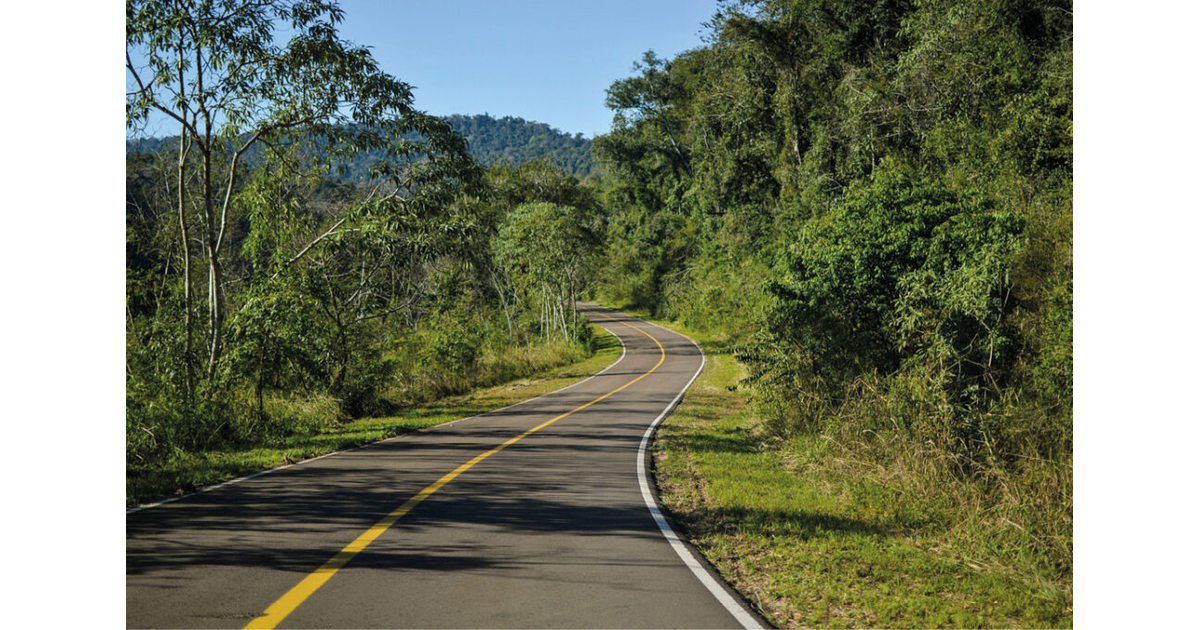

In [52]:
imagen_redimensionada = redimensionar_imagen(url, "Facebook")
imagen_redimensionada

In [54]:
def ajustar_contraste(imagen):
  img = imagen.convert('L')

  img_array = np.array(img)

  img_eq = exposure.equalize_hist(img_as_float(img_array))

  img_eq = img_as_ubyte(img_eq)

  img_eq = Image.fromarray(img_eq)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(img, cmap='gray')
  axes[0].set_title("Imagen Original")
  axes[0].axis('off')  # Quitar los ejes

  axes[1].imshow(img_eq, cmap='gray')
  axes[1].set_title("Imagen Ecualizada")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

  img_eq.save('imagen_ecualizada.jpg')
  img.save('imagen_original.jpg')

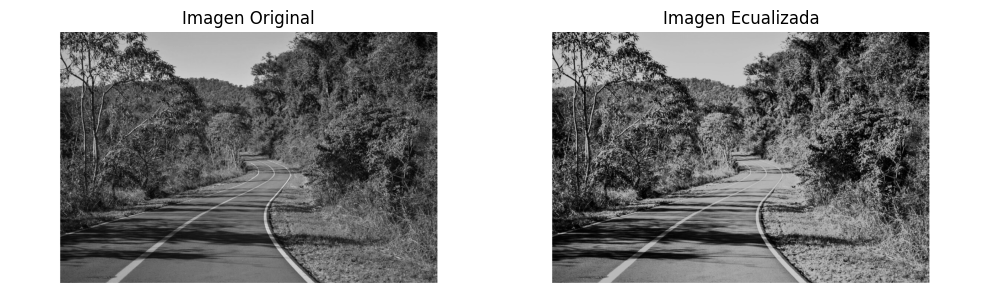

In [55]:
ajustar_contraste(imagen_redimensionada)

## Ejercicio 3

In [109]:
def aplicar_filtro(imagen_redimensionada, filtro_elegido):
  filtros = {
    "ORIGINAL": None,
    "BLUR": ImageFilter.BLUR,
    "CONTOUR": ImageFilter.CONTOUR,
    "DETAIL": ImageFilter.DETAIL,
    "EDGE ENHANCE": ImageFilter.EDGE_ENHANCE,
    "EDGE ENHANCE MORE": ImageFilter.EDGE_ENHANCE_MORE,
    "EMBOSS": ImageFilter.EMBOSS,
    "FIND EDGES": ImageFilter.FIND_EDGES,
    "SHARPEN": ImageFilter.SHARPEN,
    "SMOOTH": ImageFilter.SMOOTH
  }

  plt.ion()

  fig, axes = plt.subplots(3, 4, figsize=(15, 10))
  axes = axes.flatten()

  axes[0].imshow(imagen_redimensionada)
  axes[0].set_title("ORIGINAL", fontsize=14)
  axes[0].axis('off')

  for idx, (nombre_filtro, filtro) in enumerate(filtros.items(), start=1):
    if filtro is None:
        img_filtrada = imagen_redimensionada
    else:
        img_filtrada = imagen_redimensionada.filter(filtro)

    axes[idx].imshow(img_filtrada)
    axes[idx].set_title(nombre_filtro, fontsize=14, color="red" if nombre_filtro == filtro_elegido else "black")
    axes[idx].axis('off')

    axes[idx].set_xticks([])
    axes[idx].set_yticks([])
    axes[idx].set_xticklabels([])
    axes[idx].set_yticklabels([])

  plt.subplots_adjust(wspace=0, hspace=0)

  for i in range(len(filtros), len(axes)):
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

  plt.pause(0.1)
  plt.close()

  if filtro_elegido in filtros and filtros[filtro_elegido] is not None:
    img_filtrada = imagen_redimensionada.filter(filtros[filtro_elegido])
    img_filtrada.save(f'{filtro_elegido}_imagen_resultante.jpg')
    print(f'Imagen con filtro "{filtro_elegido}" guardada como "{filtro_elegido}_imagen_resultante.jpg".')
  else:
    imagen_redimensionada.save(f'ORIGINAL_imagen_resultante.jpg')
    print('Imagen original guardada como "ORIGINAL_imagen_resultante.jpg".')

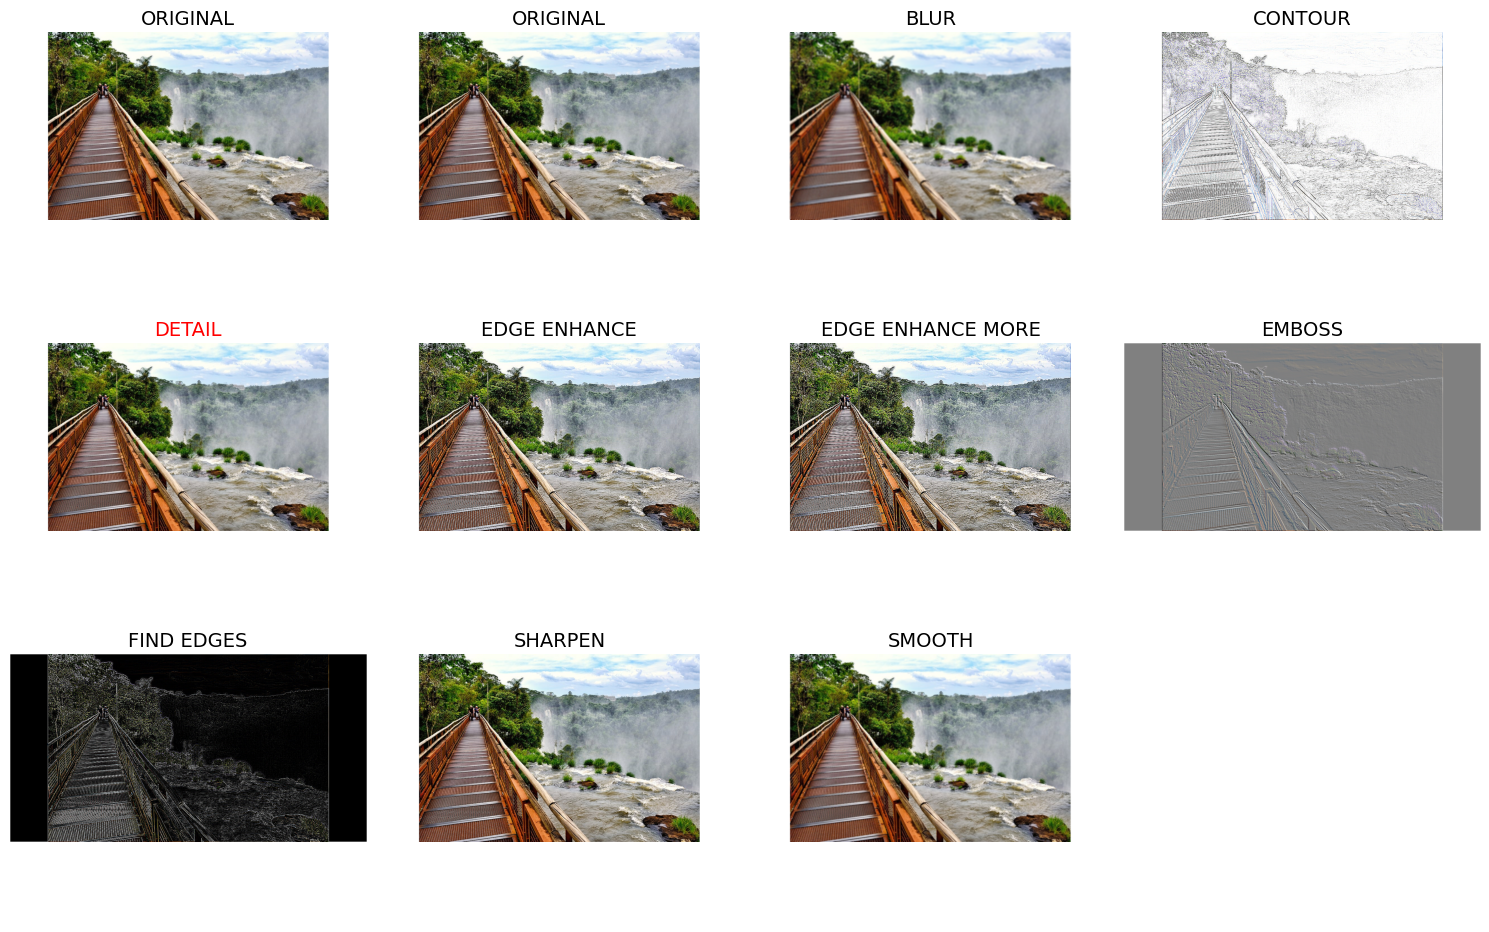

Imagen con filtro "DETAIL" guardada como "DETAIL_imagen_resultante.jpg".


In [106]:
url2 = "https://images.myguide-cdn.com/md/content/2/large/how-to-travel-from-buenos-aires-to-iguazu-falls-707115.jpg"
imagen_redimensionada2 = redimensionar_imagen(url2, "Facebook")
filtro_elegido = "DETAIL"
aplicar_filtro(imagen_redimensionada2, filtro_elegido)

##Ejercicio 4

In [86]:
def procesar_boceto(imagen_redimensionada):
  img_cv = cv2.cvtColor(np.array(imagen_redimensionada), cv2.COLOR_RGB2BGR)

  gris = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

  sobel_x = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3)

  sobel = cv2.magnitude(sobel_x, sobel_y)

  _, sobel_binarizado = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)

  sobel_binarizado_pil = Image.fromarray(sobel_binarizado)

  sobel_binarizado_pil = sobel_binarizado_pil.convert("1")

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  axes[0].imshow(imagen_redimensionada)
  axes[0].set_title("Imagen Original")
  axes[0].axis('off')

  axes[1].imshow(sobel_binarizado_pil, cmap='gray')
  axes[1].set_title("Bordes Sobel Binarizados")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

  sobel_binarizado_pil.save("bordes_sobel_binarizados.jpg")

  print("Imagen con bordes Sobel binarizados guardada como 'bordes_sobel_binarizados.jpg'.")

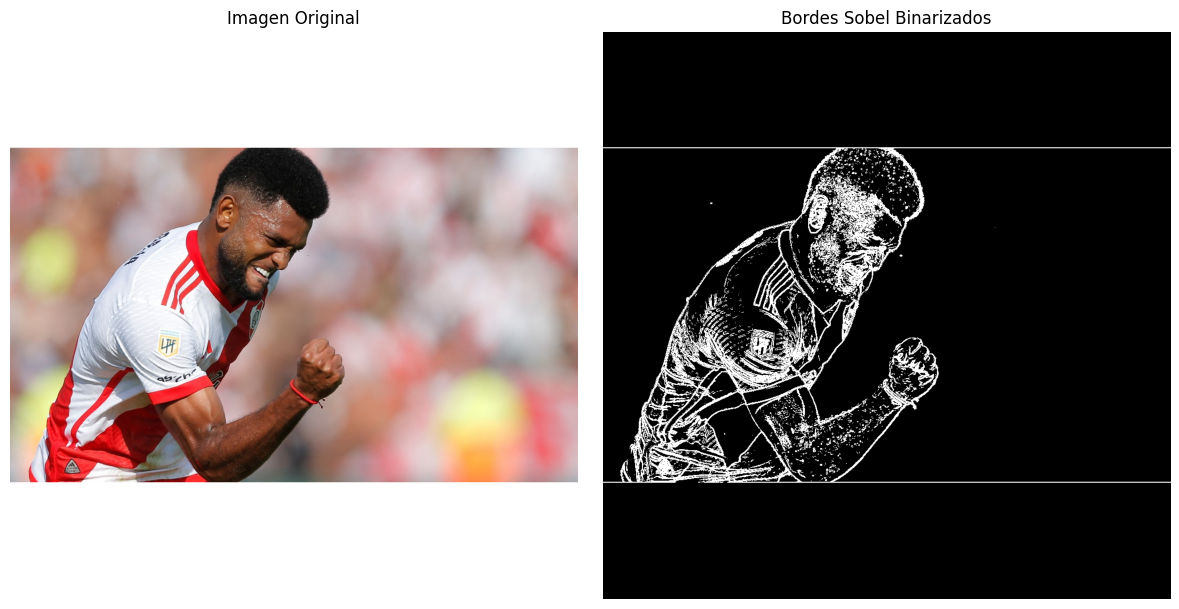

Imagen con bordes Sobel binarizados guardada como 'bordes_sobel_binarizados.jpg'.


In [92]:
url3 = "https://www.ole.com.ar/images/2024/04/21/zNwiBjwaq_1290x760__1.jpg"
imagen_redimensionada3 = redimensionar_imagen(url3, "Instagram")
procesar_boceto(imagen_redimensionada3)

Ingrese la ruta de la imagen o URL: https://www.ole.com.ar/images/2024/04/21/zNwiBjwaq_1290x760__1.jpg
Seleccione la red social (Youtube, Instagram, Twitter, Facebook): FACEBOOK
Imagen redimensionada para Facebook con éxito.

--- Menú de Opciones ---
1. Aplicar filtro
2. Generar boceto
3. Salir
Seleccione una opción (1-3): 1
Seleccione el filtro (BLUR, CONTOUR, DETAIL, EDGE ENHANCE, EDGE ENHANCE MORE, EMBOSS, FIND EDGES, SHARPEN, SMOOTH): DETAIL


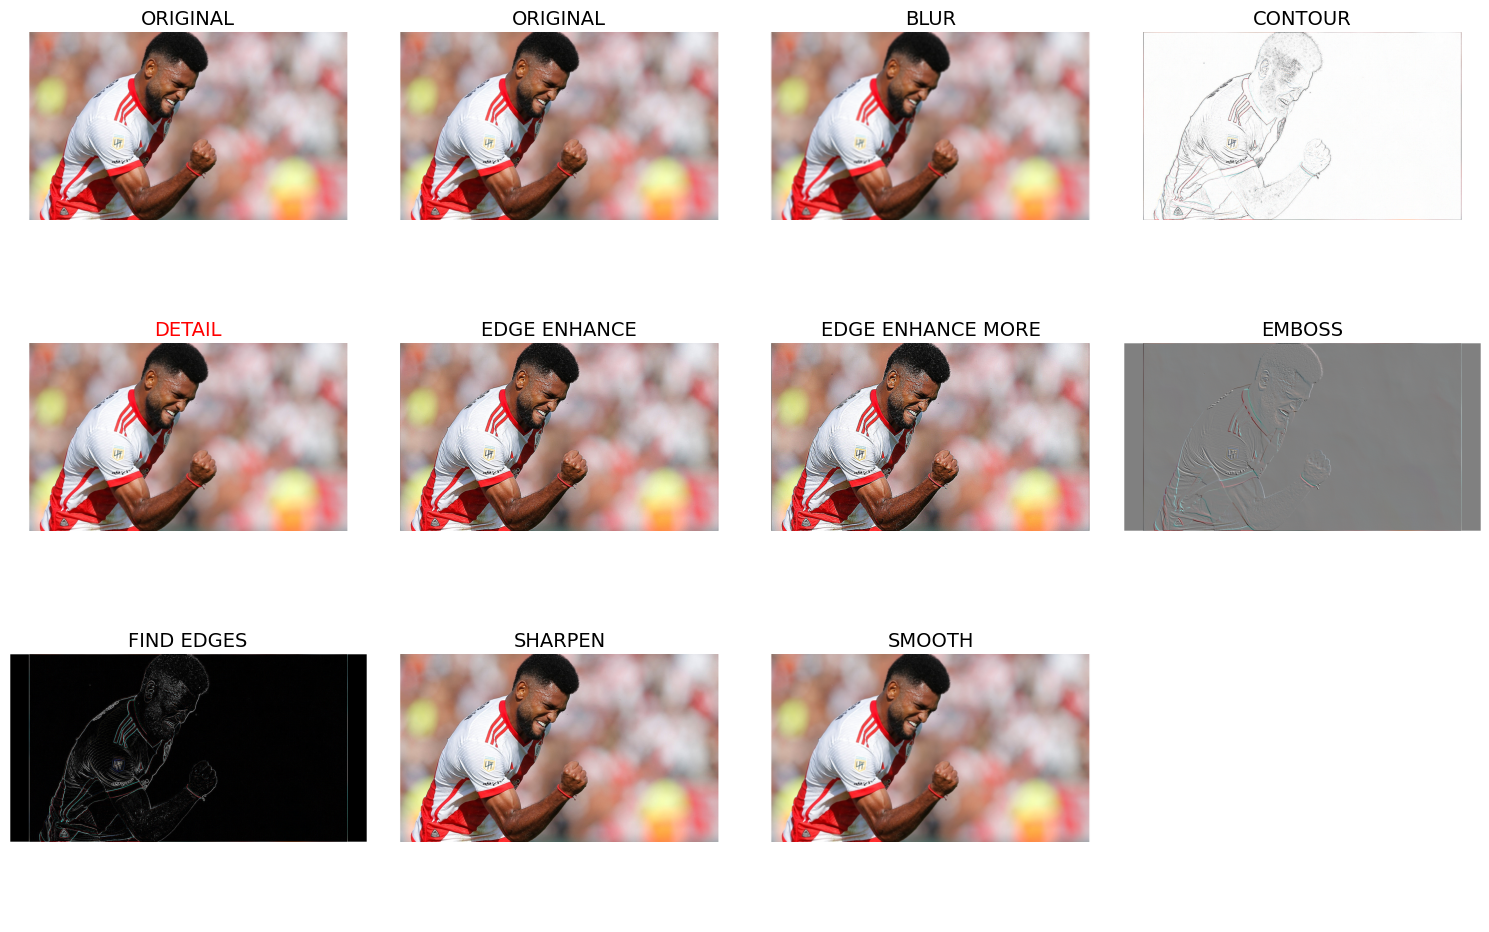

Imagen con filtro "DETAIL" guardada como "DETAIL_imagen_resultante.jpg".

--- Menú de Opciones ---
1. Aplicar filtro
2. Generar boceto
3. Salir
Seleccione una opción (1-3): 2


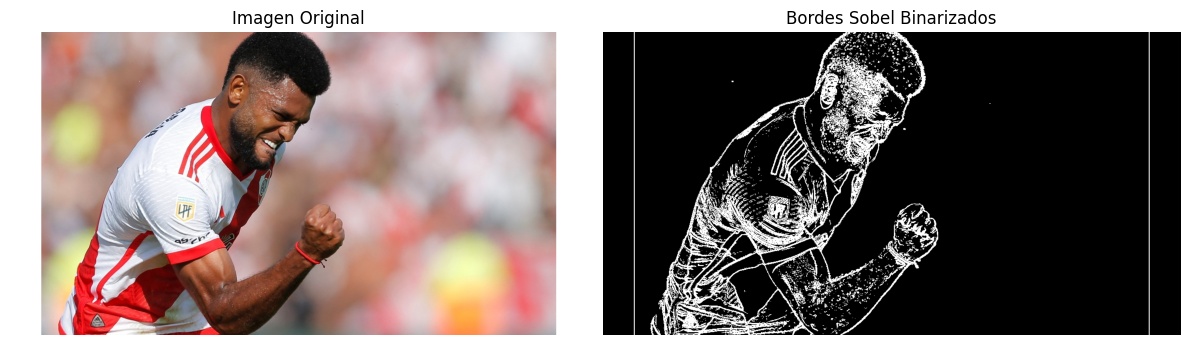

Imagen con bordes Sobel binarizados guardada como 'bordes_sobel_binarizados.jpg'.

--- Menú de Opciones ---
1. Aplicar filtro
2. Generar boceto
3. Salir
Seleccione una opción (1-3): 3
¡App Finalizada con éxito!


In [110]:
def mostrar_menu():
  while True:
    try:
      imagen = input("Ingrese la ruta de la imagen o URL: ")
      app = input("Seleccione la red social (Youtube, Instagram, Twitter, Facebook): ").capitalize()
      imagen_redimensionada = redimensionar_imagen(imagen, app)
      print(f"Imagen redimensionada para {app} con éxito.")
      break
    except Exception as e:
      print(f"Error: {e}. Intente nuevamente.")

  while True:
    print("\n--- Menú de Opciones ---")
    print("1. Aplicar filtro")
    print("2. Generar boceto")
    print("3. Salir")

    opcion = input("Seleccione una opción (1-3): ").strip().lower()

    try:
      if opcion == '1':
        filtro_elegido = input("Seleccione el filtro (BLUR, CONTOUR, DETAIL, EDGE ENHANCE, EDGE ENHANCE MORE, EMBOSS, FIND EDGES, SHARPEN, SMOOTH): ").upper()
        aplicar_filtro(imagen_redimensionada, filtro_elegido)

      elif opcion == '2':
        imagen_boceto = procesar_boceto(imagen_redimensionada)

      elif opcion == '3':
        print("¡App Finalizada con éxito!")
        break
      else:
        print("Opción inválida, por favor elija una opción entre 1 y 3.")

    except Exception as e:
        print(f"Error: {e}")

mostrar_menu()